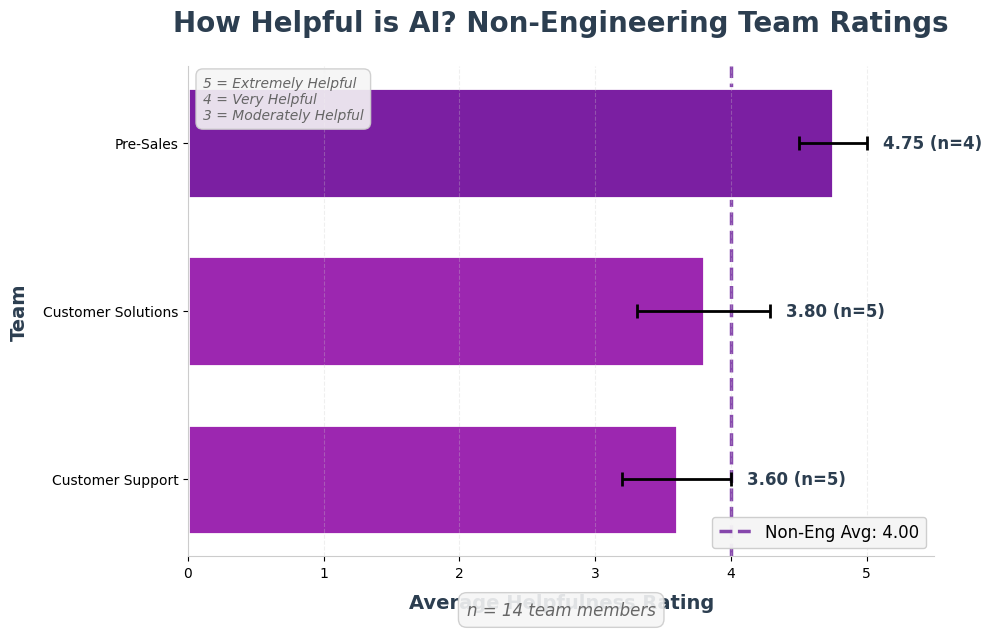


NON-ENGINEERING TEAMS - AI HELPFULNESS BY TEAM

📊 Overall Average (Non-Engineering): 4.00/5.0
   Total Team Members: 14

⭐ Team Rankings (by average helpfulness):
Rank   Team                      Avg Rating   Count    vs Avg    
1      Pre-Sales                 4.75         4        +0.75     
       └─ Extremely Helpful
2      Customer Solutions        3.80         5        -0.20     
       └─ Very Helpful
3      Customer Support          3.60         5        -0.40     
       └─ Very Helpful

✨ Key Insights:
   🏆 Highest Satisfaction: Pre-Sales (4.75/5.0)
   📉 Lowest Satisfaction: Customer Support (3.60/5.0)
   📊 Spread: 1.15 points

   • Large spread indicates varying AI value across different customer-facing roles

🔍 Non-Engineering vs Engineering Comparison:
   • Non-Engineering Average: 4.00/5.0
   • Engineering Average: 3.55/5.0
   • Difference: 0.45 points
   • Non-engineering teams rate AI HIGHER than engineering!

   • 71% of non-engineering team rates AI as 'Very' or 'Ext

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../../responses.csv')

# Filter to INCLUDE only non-engineering teams
teams_to_include = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[df['Which team are you a part of?'].isin(teams_to_include)].copy()

# Get column names
team_col = 'Which team are you a part of?'
helpfulness_col = 'On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?'

# Create numeric mapping for helpfulness
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Calculate average helpfulness by team with standard deviation
team_helpfulness = df_filtered.groupby(team_col)['rating_numeric'].agg(['mean', 'std', 'count']).reset_index()
team_helpfulness = team_helpfulness.sort_values('mean', ascending=True)

# Calculate standard error of the mean (SEM)
team_helpfulness['std'] = team_helpfulness['std'].fillna(0)  # Fill NaN with 0 for single values
team_helpfulness['SEM'] = team_helpfulness['std'] / np.sqrt(team_helpfulness['count'])

# Calculate overall average
overall_avg = df_filtered['rating_numeric'].mean()

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.4))

# Define modern, vibrant color palette (purple to pink gradient based on rating)
# Higher ratings get more vibrant purple/pink colors
purple_pink_colors = ['#E1BEE7', '#CE93D8', '#BA68C8', '#AB47BC', '#9C27B0', '#8E24AA', '#7B1FA2', '#6A1B9A']
# Map colors based on rating (higher = more vibrant)
colors = []
for rating in team_helpfulness['mean']:
    # Map rating (1-5) to color index (0-7)
    color_idx = min(int((rating - 1) / 4 * (len(purple_pink_colors) - 1)), len(purple_pink_colors) - 1)
    colors.append(purple_pink_colors[color_idx])

# Calculate max value with error for xlim
max_with_error = (team_helpfulness['mean'] + team_helpfulness['SEM']).max()

bars = ax.barh(team_helpfulness[team_col], team_helpfulness['mean'], 
                xerr=team_helpfulness['SEM'],
                color=colors, height=0.65, edgecolor='white', linewidth=2,
                capsize=5, error_kw={'linewidth': 2, 'capthick': 2})

# Add value labels with count, positioned after error bars
for bar, avg, sem, count in zip(bars, team_helpfulness['mean'], team_helpfulness['SEM'], team_helpfulness['count']):
    label_x = avg + sem + 0.12  # Position after error bar
    ax.text(label_x, bar.get_y() + bar.get_height()/2, 
            f'{avg:.2f} (n={int(count)})', 
            va='center', fontsize=12, weight='bold', color='#2C3E50')

# Add overall average line with better styling
ax.axvline(overall_avg, color='#6A1B9A', linestyle='--', linewidth=2.5, 
           alpha=0.8, label=f'Non-Eng Avg: {overall_avg:.2f}', zorder=0)

# Customize plot
ax.set_xlabel('Average Helpfulness Rating', fontsize=14, weight='bold', color='#2C3E50', labelpad=10)
ax.set_ylabel('Team', fontsize=14, weight='bold', color='#2C3E50', labelpad=10)
ax.set_title('How Helpful is AI? Non-Engineering Team Ratings', 
             fontsize=20, weight='bold', pad=25, color='#2C3E50')
ax.set_xlim(0, max(5.5, max_with_error + 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')
ax.legend(fontsize=12, loc='lower right', framealpha=0.95, 
          edgecolor='#CCCCCC', facecolor='#F5F5F5')
ax.grid(axis='x', alpha=0.3, linestyle='--', color='#CCCCCC')

# Add rating scale reference with improved styling
ax.text(0.02, 0.98, '5 = Extremely Helpful\n4 = Very Helpful\n3 = Moderately Helpful', 
        transform=ax.transAxes, ha='left', va='top',
        fontsize=10, style='italic', color='#666666',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', 
                 edgecolor='#CCCCCC', linewidth=1, alpha=0.9))

# Add subtitle with improved styling
plt.text(0.5, -0.12, f'n = {len(df_filtered)} team members', 
         ha='center', transform=ax.transAxes,
         fontsize=12, style='italic', color='#666666',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', 
                  edgecolor='#CCCCCC', linewidth=1, alpha=0.9))

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("NON-ENGINEERING TEAMS - AI HELPFULNESS BY TEAM")
print("="*80)

print(f"\n📊 Overall Average (Non-Engineering): {overall_avg:.2f}/5.0")
print(f"   Total Team Members: {len(df_filtered)}")

print(f"\n⭐ Team Rankings (by average helpfulness):")
print(f"{'Rank':<6} {'Team':<25} {'Avg Rating':<12} {'Count':<8} {'vs Avg':<10}")
print("="*80)

for i, (_, row) in enumerate(team_helpfulness.sort_values('mean', ascending=False).iterrows(), 1):
    team = row[team_col]
    avg = row['mean']
    count = int(row['count'])
    diff = avg - overall_avg
    
    # Determine if above or below average
    comparison = f"+{diff:.2f}" if diff > 0 else f"{diff:.2f}"
    
    # Determine rating label
    if avg >= 4.5:
        rating_label = "Extremely Helpful"
    elif avg >= 3.5:
        rating_label = "Very Helpful"
    elif avg >= 2.5:
        rating_label = "Moderately Helpful"
    else:
        rating_label = "Slightly Helpful"
    
    print(f"{i:<6} {team:<25} {avg:<12.2f} {count:<8} {comparison:<10}")
    print(f"       └─ {rating_label}")

print(f"\n✨ Key Insights:")

# Top and bottom teams
if len(team_helpfulness) > 1:
    top_team = team_helpfulness.iloc[-1]
    bottom_team = team_helpfulness.iloc[0]
    
    print(f"   🏆 Highest Satisfaction: {top_team[team_col]} ({top_team['mean']:.2f}/5.0)")
    print(f"   📉 Lowest Satisfaction: {bottom_team[team_col]} ({bottom_team['mean']:.2f}/5.0)")
    print(f"   📊 Spread: {top_team['mean'] - bottom_team['mean']:.2f} points")
    
    if top_team['mean'] - bottom_team['mean'] < 0.5:
        print(f"\n   • Small spread indicates consistent satisfaction across non-engineering teams")
    elif top_team['mean'] - bottom_team['mean'] > 1.0:
        print(f"\n   • Large spread indicates varying AI value across different customer-facing roles")
    else:
        print(f"\n   • Moderate spread indicates some variation in AI satisfaction")

# Compare to engineering average if available (you mentioned it was ~4.2)
# We'll calculate it from the full dataset
eng_teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_eng = df[~df['Which team are you a part of?'].isin(eng_teams_to_exclude)].copy()
df_eng['rating_numeric'] = df_eng[helpfulness_col].map(rating_values)
eng_avg = df_eng['rating_numeric'].mean()

print(f"\n🔍 Non-Engineering vs Engineering Comparison:")
print(f"   • Non-Engineering Average: {overall_avg:.2f}/5.0")
print(f"   • Engineering Average: {eng_avg:.2f}/5.0")
print(f"   • Difference: {abs(overall_avg - eng_avg):.2f} points")

if overall_avg > eng_avg:
    print(f"   • Non-engineering teams rate AI HIGHER than engineering!")
elif overall_avg < eng_avg:
    print(f"   • Engineering teams rate AI higher than non-engineering")
    print(f"   • Opportunity: Better AI tools/training for customer-facing roles")
else:
    print(f"   • Both groups rate AI equally - strong company-wide adoption")

# High ratings percentage
high_ratings = df_filtered[df_filtered[helpfulness_col].isin(['Extremely Helpful', 'Very Helpful'])]
high_ratings_pct = (len(high_ratings) / len(df_filtered)) * 100

print(f"\n   • {high_ratings_pct:.0f}% of non-engineering team rates AI as 'Very' or 'Extremely' Helpful")

print("\n" + "="*80 + "\n")